## Week-1 Assignment
Fill the missing places wherever TO DO is mentioned and also understnad what has been done properly

Also report :
- Asset with highest expected return:
- Asset with highest volatility:
- If there is any negatively correlated pairs (corr < -0.1) and if yes also mention which are they

Do not use Chatgpt . It is a simple assignment. Make a copy of this colab notebook and do your changes and submit it as `Assignment1_yourrollno.ipnyb`


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


In [ ]:
TICKERS = ['ICICIBANK.NS', 'INFY.NS', 'LT.NS']  # you can change these take any 3 assets that are in yfinance
print("Selected assets:", TICKERS)


Selected assets: ['ICICIBANK.NS', 'INFY.NS', 'LT.NS']


In [ ]:
import yfinance as yf
TICKERS = ['AAPL', 'MSFT']  # Add your tickers here
prices = yf.download(TICKERS, period="3y") #downlaod data of 3yrs
prices = prices.xs('Close', axis=1, level=0)
# TO DO :Clean missing values using dropna and fillna
prices = prices.dropna(how='all')
prices = prices.fillna(method='ffill') --p


prices.tail(10)

/tmp/ipython-input-989183086.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(TICKERS, period="3y") #downlaod data of 3yrs
[*********************100%***********************]  2 of 2 completed
/tmp/ipython-input-989183086.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method='ffill')


Ticker,AAPL,MSFT
Date,,
2025-12-01,283.100006,486.739990
2025-12-02,286.190002,490.000000
2025-12-03,284.149994,477.730011
2025-12-04,280.700012,480.839996
2025-12-05,278.779999,483.160004
2025-12-08,277.890015,491.019989
2025-12-09,277.179993,492.019989
2025-12-10,278.779999,478.559998
2025-12-11,278.029999,483.470001


In [ ]:
import numpy as np  # Add this import
import yfinance as yf
# TO DO : Simple Returns (Make sure to drop first row or NaN values as for first row we dont have any previous data)
simple_returns = prices.pct_change()
simple_returns = simple_returns.dropna()

# TO DO : Log Returns (Make sure to drop first row or NaN values as for first row we dont have any previous data)
log_returns = np.log(prices / prices.shift(1))
log_returns = log_returns.dropna()

print("\nSimple Returns :")
display(simple_returns.head(10))

print("\nLog Returns :")
display(log_returns.head(10))


Simple Returns :


Ticker,AAPL,MSFT
Date,,
2022-12-14,-0.015536,0.001168
2022-12-15,-0.046854,-0.031918
2022-12-16,-0.014579,-0.017349
2022-12-19,-0.015910,-0.017328
2022-12-20,-0.000529,0.005614
2022-12-21,0.023810,0.010877
2022-12-22,-0.023773,-0.025529
2022-12-23,-0.002798,0.002267
2022-12-27,-0.013879,-0.007414



Log Returns :


Ticker,AAPL,MSFT
Date,,
2022-12-14,-0.015658,0.001167
2022-12-15,-0.047987,-0.032439
2022-12-16,-0.014686,-0.017501
2022-12-19,-0.016037,-0.017480
2022-12-20,-0.000529,0.005599
2022-12-21,0.023531,0.010818
2022-12-22,-0.024060,-0.025860
2022-12-23,-0.002802,0.002265
2022-12-27,-0.013976,-0.007442


In [ ]:
import numpy as np
TRADING_DAYS = 252

# TO DO : Annual expected return (mean log return × 252)
expected_return = log_returns.mean() * TRADING_DAYS

# TO DO : Annualized volatility (std of returns × sqrt(252))
volatility = log_returns.std() * np.sqrt(TRADING_DAYS)

print("\n Annualized Expected Return")
display(expected_return)

print("\n Annualized Volatility (Risk)")
display(volatility)


 Annualized Expected Return


,0
Ticker,
AAPL,0.222387
MSFT,0.216339



 Annualized Volatility (Risk)


,0
Ticker,
AAPL,0.259032
MSFT,0.233256


In [ ]:
# TO DO : Covariance (annualized)- first find daily covariance (using log return) and then find the annual covariance
cov_daily = log_returns.cov()
cov_annual = cov_daily * TRADING_DAYS

# TO DO : Correlation matrix
corr = log_returns.corr()

print("\n Covariance Matrix (Annualized) ")
display(cov_annual)

print("\n Correlation Matrix ")
display(corr)



 Covariance Matrix (Annualized) 


Ticker,AAPL,MSFT
Ticker,,
AAPL,0.067098,0.029957
MSFT,0.029957,0.054408



 Correlation Matrix 


Ticker,AAPL,MSFT
Ticker,,
AAPL,1.000000,0.495811
MSFT,0.495811,1.000000


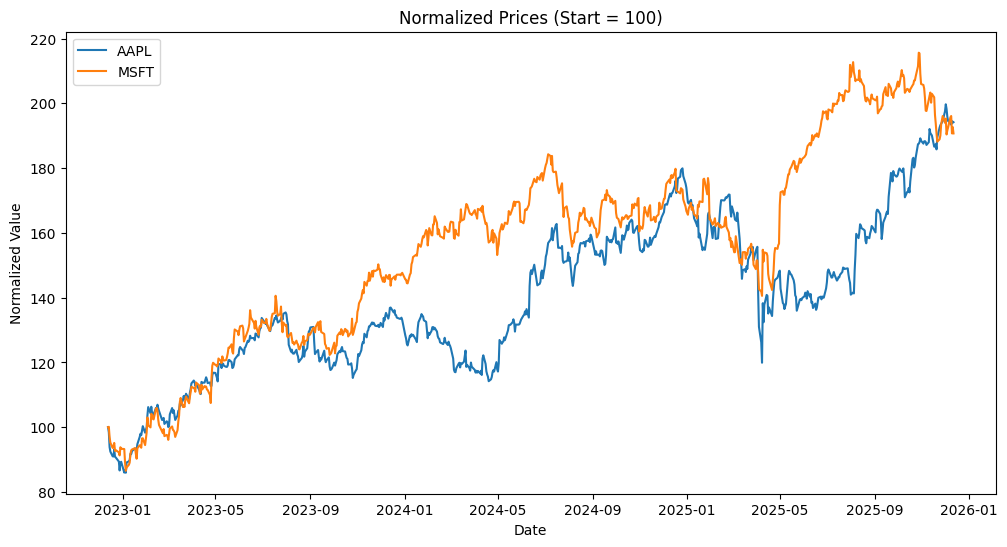

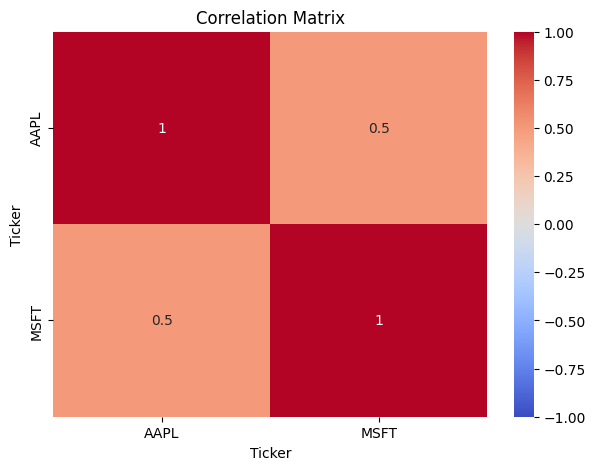

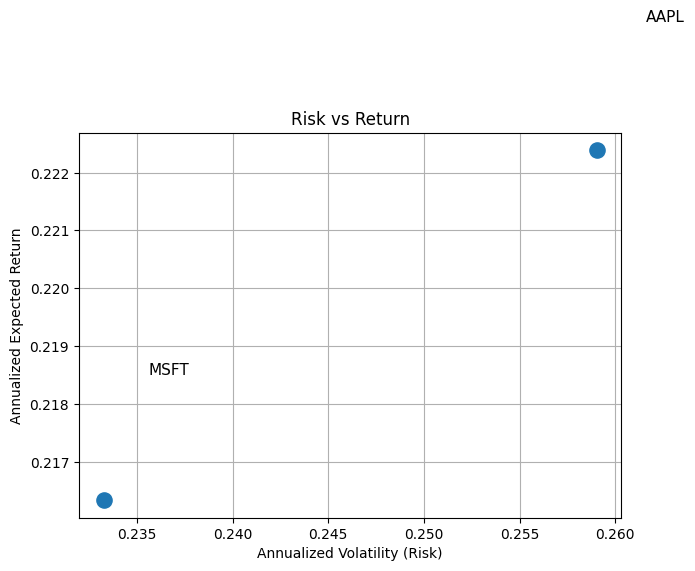

In [ ]:
import matplotlib.pyplot as plt  # For plt
import seaborn as sns  # For sns.heatmap
import numpy as np
corr = log_returns.corr()
#Visualization
norm_prices = prices / prices.iloc[0] * 100
plt.figure(figsize=(12,6))
for col in norm_prices.columns:
    plt.plot(norm_prices.index, norm_prices[col], label=col)

plt.title("Normalized Prices (Start = 100)")
plt.ylabel("Normalized Value")
plt.xlabel("Date")
plt.legend()
plt.show()

# 2) Correlation Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# 3) Risk vs Return Scatter
plt.figure(figsize=(7,5))
plt.scatter(volatility, expected_return, s=120)

for t in TICKERS:
    plt.text(volatility[t]*1.01, expected_return[t]*1.01, t, fontsize=11)

plt.xlabel("Annualized Volatility (Risk)")
plt.ylabel("Annualized Expected Return")
plt.title("Risk vs Return")
plt.grid(True)
plt.show()